<a href="https://colab.research.google.com/github/jluisespejo012-pixel/regresion-lineal/blob/main/Jorge_espejo_regresi%C3%B3n_lineal_taxi_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#@title Copyright 2023 Google LLC. Double-click here for license information.
# Licenciado bajo la Licencia Apache, Versión 2.0 (la "Licencia");
# no puede usar este archivo excepto de conformidad con la Licencia.
# Puede obtener una copia de la Licencia en:
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# A menos que la ley aplicable lo exija o se haya acordado por escrito,
# el software distribuido bajo la Licencia se distribuye "TAL CUAL",
# SIN GARANTÍAS NI CONDICIONES DE NINGÚN TIPO, ya sean expresas o implícitas.
# Consulte la Licencia para conocer el lenguaje específico que rige
# los permisos y limitaciones bajo la Licencia.


# Colabs

Machine Learning Crash Course utiliza Colaboratories (Colabs) para todos los ejercicios de programación. Colab es la implementación de Google de Jupyter Notebook. Para obtener más información sobre Colabs y cómo usarlos, ve a Welcome to Colaboratory.

# Linear Regression
En este Colab utilizarás un conjunto de datos real para entrenar un modelo que prediga la tarifa de un viaje en taxi en Chicago, Illinois.

## Learning Objectives
Después de completar este Colab, podrás:

  * Leer un archivo .csv en un DataFrame de pandas.
  * Explorar un conjunto de datos utilizando bibliotecas de visualización de Python.
  * Experimentar con diferentes características (features) para construir un modelo de regresión lineal.
  * Ajustar los hiperparámetros del modelo.
  * Comparar ejecuciones de entrenamiento utilizando el error cuadrático medio (RMSE) y las curvas de pérdida.

## Dataset Description
El conjunto de datos para este ejercicio se deriva del City of Chicago Taxi Trips dataset. Los datos usados aquí son un subconjunto de esa base y corresponden a un periodo de dos días en mayo de 2022.


# Parte 1 - Configuración del ejercicio


---

## Cargar los módulos necesarios

Este ejercicio depende de varias bibliotecas de Python que ayudan con la manipulación de datos, las tareas de aprendizaje automático y la visualización de datos.

**Instrucciones**
1. Ejecuta la celda de código **Install required libraries** (debajo).
2. Ejecuta la celda de código **Load dependencies** (debajo).


In [17]:
#@title Install required libraries
# @title Instalar las bibliotecas necesarias

!pip install google-ml-edu==0.1.3 \
  keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  tensorflow~=2.18.0

print('\n\nTodos los requisitos se han instalado correctamente.')



Todos los requisitos se han instalado correctamente.


In [18]:
#@title Code - Load dependencies
# @title Código - Cargar dependencias

# data / datos
import numpy as np
import pandas as pd

# machine learning / aprendizaje automático
import keras
import ml_edu.experiment
import ml_edu.results

# data visualization / visualización de datos
import plotly.express as px


## Load the dataset
## Cargar el conjunto de datos

La siguiente celda de código carga el conjunto de datos y crea un DataFrame de pandas.

Puedes pensar en un DataFrame como una hoja de cálculo con filas y columnas.  
Las filas representan ejemplos individuales de datos, y las columnas representan los atributos asociados a cada ejemplo.


In [19]:
# @title
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

## Update the dataframe
## Actualizar el DataFrame

La siguiente celda de código actualiza el DataFrame para usar únicamente columnas específicas del conjunto de datos.

Observa que la salida muestra solo una muestra del conjunto de datos, pero debería ser suficiente para que identifiques las características asociadas al dataset y puedas revisar los datos reales de algunos ejemplos.


In [20]:
#@title Code - Read dataset

# Updates dataframe to use specific columns.
training_df = chicago_taxi_dataset.loc[:, ('TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE')]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


# Part 2 - Dataset Exploration
# Parte 2 - Exploración del conjunto de datos



---

## View dataset statistics
## Ver estadísticas del conjunto de datos

Una gran parte de la mayoría de proyectos de aprendizaje automático consiste en conocer bien tus datos.  
En este paso, utilizarás el método `DataFrame.describe` para ver estadísticas descriptivas del conjunto de datos y responder algunas preguntas importantes sobre la información disponible.

**Instrucciones**
1. Ejecuta la celda de código **View dataset statistics**.
2. Inspecciona la salida y responde estas preguntas:
   * ¿Cuál es la tarifa máxima?
   * ¿Cuál es la distancia media de todos los viajes?
   * ¿Cuántas compañías de taxi hay en el conjunto de datos?
   * ¿Cuál es el tipo de pago más frecuente?
   * ¿Alguna característica tiene datos faltantes?
3. Ejecuta la celda de código **View answers to dataset statistics** para verificar tus respuestas.

Quizás te preguntes por qué aparecen grupos de valores `NaN` (not a number) en la salida.  
Al trabajar con datos en Python, este valor puede aparecer si el resultado de un cálculo no puede determinarse o si falta información.  
Por ejemplo, en el conjunto de datos de taxis, `PAYMENT_TYPE` y `COMPANY` son características categóricas no numéricas; valores numéricos como el promedio o el máximo no tienen sentido para estas características, por lo que la salida m_


In [21]:
#@title Code - View dataset statistics
# @title Código - Ver estadísticas del conjunto de datos

print('Número total de filas: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')


Número total de filas: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


In [22]:
#@title Double-click or run to view answers about dataset statistics
# @title Doble clic o ejecuta para ver las respuestas sobre las estadísticas del conjunto de datos

answer = '''
¿Cuál es la tarifa máxima? 				              Respuesta: $159.25
¿Cuál es la distancia media de todos los viajes? 		Respuesta: 8.2895 millas
¿Cuántas compañías de taxi hay en el conjunto de datos? 		  Respuesta: 31
¿Cuál es el tipo de pago más frecuente? 		    Respuesta: Tarjeta de crédito
¿Alguna característica tiene datos faltantes? 				          Respuesta: No
'''

# You should be able to find the answers to the questions about the dataset
# by inspecting the table output after running the DataFrame describe method.
# Deberías poder encontrar las respuestas a las preguntas del conjunto de datos
# inspeccionando la tabla que se muestra después de ejecutar el método DataFrame.describe.
#
# Run this code cell to verify your answers.
# Ejecuta esta celda de código para verificar tus respuestas.

# What is the maximum fare?
# ¿Cuál es la tarifa máxima?
max_fare = training_df['FARE'].max()
print("¿Cuál es la tarifa máxima? 				Respuesta: ${fare:.2f}".format(fare = max_fare))

# What is the mean distance across all trips?
# ¿Cuál es la distancia media de todos los viajes?
mean_distance = training_df['TRIP_MILES'].mean()
print("¿Cuál es la distancia media de todos los viajes? 		Respuesta: {mean:.4f} millas".format(mean = mean_distance))

# How many cab companies are in the dataset?
# ¿Cuántas compañías de taxi hay en el conjunto de datos?
num_unique_companies =  training_df['COMPANY'].nunique()
print("¿Cuántas compañías de taxi hay en el conjunto de datos? 		Respuesta: {number}".format(number = num_unique_companies))

# What is the most frequent payment type?
# ¿Cuál es el tipo de pago más frecuente?
most_freq_payment_type = training_df['PAYMENT_TYPE'].value_counts().idxmax()
print("¿Cuál es el tipo de pago más frecuente? 		Respuesta: {type}".format(type = most_freq_payment_type))

# Are any features missing data?
# ¿Alguna característica tiene datos faltantes?
missing_values = training_df.isnull().sum().sum()
print("¿Alguna característica tiene datos faltantes? 				Respuesta:", "No" if missing_values == 0 else "Sí")


¿Cuál es la tarifa máxima? 				Respuesta: $159.25
¿Cuál es la distancia media de todos los viajes? 		Respuesta: 8.2895 millas
¿Cuántas compañías de taxi hay en el conjunto de datos? 		Respuesta: 31
¿Cuál es el tipo de pago más frecuente? 		Respuesta: Credit Card
¿Alguna característica tiene datos faltantes? 				Respuesta: No


## Generate a correlation matrix
## Generar una matriz de correlación

Una parte importante del aprendizaje automático es determinar qué características (features) se correlacionan con la etiqueta (label).  
Si alguna vez has tomado un taxi, probablemente tu experiencia te diga que la tarifa suele estar asociada con la distancia recorrida y la duración del viaje.  
Pero, ¿existe alguna forma de saber con mayor precisión qué tan bien se correlacionan estas características con la tarifa (la etiqueta)?

En este paso, utilizarás una **matriz de correlación** para identificar las características cuyos valores se correlacionan bien con la etiqueta.  
Los valores de correlación tienen los siguientes significados:

  * **`1.0`**: correlación positiva perfecta; es decir, cuando un atributo aumenta, el otro también aumenta.
  * **`-1.0`**: correlación negativa perfecta; es decir, cuando un atributo aumenta, el otro disminuye.
  * **`0.0`**: sin correlación; las dos columnas **no están relacionadas linealmente**.

En general, mientras mayor sea el valor absoluto de una correlación, mayor será su poder predictivo.

**Instrucciones**

1. Revisa el código en la celda **View correlation matrix**.
2. Ejecuta la celda **View correlation matrix** y analiza la salida.
3. **Verifica tu comprensión** respondiendo estas preguntas:
   * ¿Qué característica se correlaciona más fuertemente con la etiqueta **FARE**?
   * ¿Qué característica se correlaciona menos fuertemente con la etiqueta **FARE**?


In [23]:
#@title Code - View correlation matrix
# @title Código - Ver matriz de correlación

training_df.corr(numeric_only = True)


,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


In [24]:
#@title Double-click to view answers about the correlation matrix
# @title Doble clic para ver las respuestas sobre la matriz de correlación

# Which feature correlates most strongly to the label FARE?
# ---------------------------------------------------------
# ¿Qué característica se correlaciona más fuertemente con la etiqueta FARE?
answer = '''
La característica con la correlación más fuerte con FARE es TRIP_MILES.
Como era de esperarse, TRIP_MILES parece ser una buena característica para comenzar
a entrenar el modelo. Además, observa que la característica TRIP_SECONDS también
tiene una fuerte correlación con la tarifa.
'''
print(answer)


# Which feature correlates least strongly to the label FARE?
# -----------------------------------------------------------
# ¿Qué característica se correlaciona menos con la etiqueta FARE?
answer = '''La característica con la correlación más débil con FARE es TIP_RATE.'''
print(answer)



La característica con la correlación más fuerte con FARE es TRIP_MILES.
Como era de esperarse, TRIP_MILES parece ser una buena característica para comenzar
a entrenar el modelo. Además, observa que la característica TRIP_SECONDS también
tiene una fuerte correlación con la tarifa.

La característica con la correlación más débil con FARE es TIP_RATE.


## Visualize relationships in dataset
## Visualizar relaciones en el conjunto de datos

A veces es útil visualizar las relaciones entre las características de un conjunto de datos; una forma de hacerlo es mediante un *pair plot*.  
Un **pair plot** genera una cuadrícula de gráficos por pares para visualizar la relación de cada característica con todas las demás, todo en un mismo lugar.

**Instrucciones**
1. Ejecuta la celda de código **View pair plot**.


In [25]:
#@title Code - View pairplot
# @title Código - Ver pairplot

px.scatter_matrix(training_df, dimensions=["FARE", "TRIP_MILES", "TRIP_SECONDS"])


# Part 3 - Train Model
# Parte 3 - Entrenar el modelo



---

## Define functions to build and train a model
## Definir funciones para construir y entrenar un modelo

El código que necesitas para construir y entrenar tu modelo se encuentra en la celda **Define ML functions**.  
Si deseas explorar este código, expande la celda y revisa su contenido.

**Instrucciones**
1. Ejecuta la celda de código **Define ML functions**.


In [26]:
#@title Code - Define ML functions
# @title Código - Definir funciones de ML

def create_model(
    settings: ml_edu.experiment.ExperimentSettings,
    metrics: list[keras.metrics.Metric],
) -> keras.Model:
  """Crear y compilar un modelo simple de regresión lineal."""
  # Describir la topografía del modelo.
  # La topografía de un modelo de regresión lineal simple
  # es un único nodo en una sola capa.
  inputs = {name: keras.Input(shape=(1,), name=name) for name in settings.input_features}
  concatenated_inputs = keras.layers.Concatenate()(list(inputs.values()))
  outputs = keras.layers.Dense(units=1)(concatenated_inputs)
  model = keras.Model(inputs=inputs, outputs=outputs)

  # Compilar la topografía del modelo en código que Keras pueda ejecutar eficientemente.
  # Configurar el entrenamiento para minimizar el error cuadrático medio del modelo.
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=settings.learning_rate),
                loss="mean_squared_error",
                metrics=metrics)

  return model


def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    label_name: str,
    settings: ml_edu.experiment.ExperimentSettings,
) -> ml_edu.experiment.Experiment:
  """Entrenar el modelo alimentándolo con datos."""

  # Alimentar al modelo con las características y la etiqueta.
  # El modelo entrenará durante el número de épocas especificado.
  features = {name: dataset[name].values for name in settings.input_features}
  label = dataset[label_name].values
  history = model.fit(x=features,
                      y=label,
                      batch_size=settings.batch_size,
                      epochs=settings.number_epochs)

  return ml_edu.experiment.Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
  )

print("SUCCESS: defining linear regression functions complete.")
print("ÉXITO: definición de las funciones de regresión lineal completada.")


SUCCESS: defining linear regression functions complete.
ÉXITO: definición de las funciones de regresión lineal completada.


## Train a model with one feature
## Entrenar un modelo con una sola característica

En este paso entrenarás un modelo para predecir el costo de la tarifa usando una **única característica**.  
Anteriormente viste que `TRIP_MILES` (distancia) es la característica que más fuertemente se correlaciona con `FARE`, así que empezaremos con `TRIP_MILES` como la característica para tu primera ejecución de entrenamiento.

**Instrucciones**

1. Ejecuta la celda de código **Experiment 1** para construir tu modelo con una sola característica.
2. Revisa la salida de la ejecución del entrenamiento.
3. **Verifica tu comprensión** respondiendo estas preguntas:
   * ¿Cuántas épocas (epochs) tomó para que el modelo converja?
   * ¿Qué tan bien se ajusta el modelo a los datos de ejemplo?

Durante el entrenamiento, deberías ver el error cuadrático medio de raíz (RMSE) en la salida.  
Las unidades del RMSE son las mismas que las de la etiqueta (dólares).  
En otras palabras, puedes usar el RMSE para saber qué tan lejos, en promedio, están las tarifas predichas respecto de los valores observados.


Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1485.5626 - rmse: 38.5276
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 973.5027 - rmse: 31.1838
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 577.3716 - rmse: 24.0075
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 285.6248 - rmse: 16.8684
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 100.7522 - rmse: 9.9990 
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 21.3417 - rmse: 4.5825
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16.1061 - rmse: 4.0064
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15.0177 - rmse: 3.8695
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.0034 - rmse: 3.6014
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.0071 - rmse: 3.8679
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.1651 - rmse: 3.6118
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.8094 - rms

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


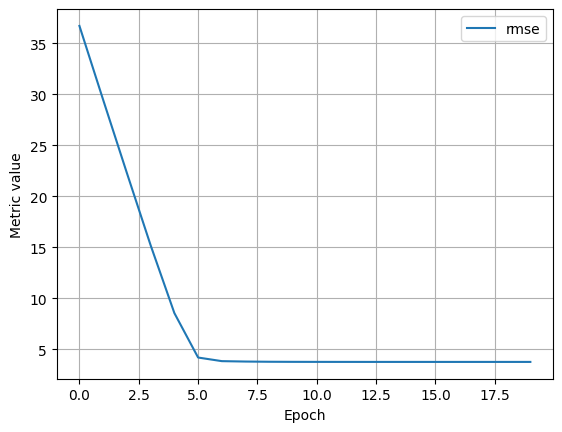

In [27]:
#@title Code - Experiment 1
# @title Código - Experimento 1

# The following variables are the hyperparameters.
# Las siguientes variables son los hiperparámetros.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')


Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4417.8184 - rmse: 64.0754
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3541.9705 - rmse: 59.3520
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3243.7510 - rmse: 56.9227
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3238.7476 - rmse: 56.8123
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3137.4055 - rmse: 55.5381
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3148.1865 - rmse: 55.7714
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3201.6296 - rmse: 56.4905
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3362.7981 - rmse: 57.9303
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3414.7383 - rmse: 58.3840
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3236.4578 - rmse: 56.6067
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3217.5750 - rmse: 56.4704
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

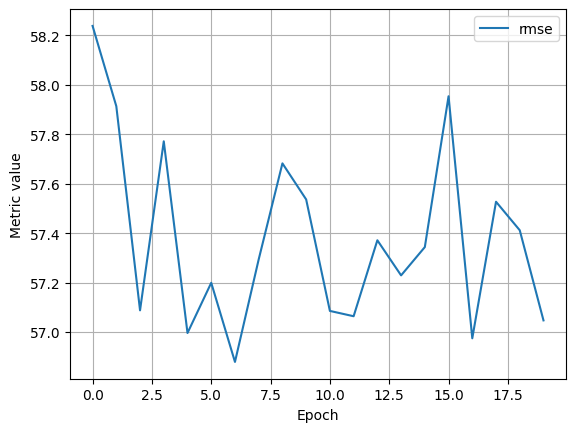

In [31]:
#@title Code - Experiment 1
# @title Código - Experimento 1

# The following variables are the hyperparameters.
# Las siguientes variables son los hiperparámetros.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 10.0,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')


Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 536.2332 - rmse: 23.1563
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 534.6398 - rmse: 23.1210
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 533.0789 - rmse: 23.0881
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 528.3066 - rmse: 22.9846
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 536.4631 - rmse: 23.1603
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 523.5314 - rmse: 22.8805
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 518.2773 - rmse: 22.7642
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 517.8973 - rmse: 22.7567
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 516.2299 - rmse: 22.7203
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 511.6107 - rmse: 22.6182
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 503.2493 - rmse: 22.4326
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 49

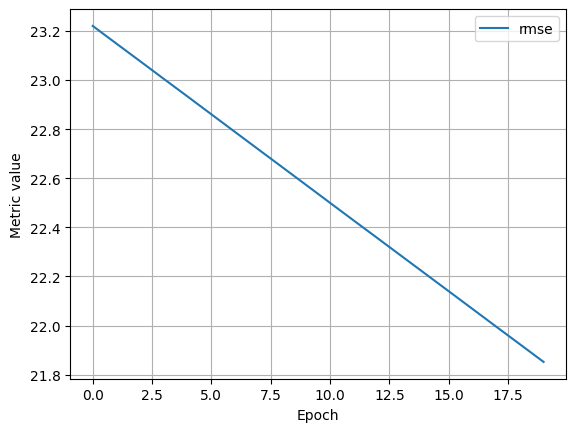

In [33]:
#@title Code - Experiment 1
# @title Código - Experimento 1

# The following variables are the hyperparameters.
# Las siguientes variables son los hiperparámetros.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.00001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')


Epoch 1/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1938.7982 - rmse: 44.0191
Epoch 2/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1324.0967 - rmse: 36.3759
Epoch 3/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 862.9112 - rmse: 29.3597
Epoch 4/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 489.6085 - rmse: 22.1009
Epoch 5/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 223.3964 - rmse: 14.9218
Epoch 6/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 70.1668 - rmse: 8.3355
Epoch 7/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16.7374 - rmse: 4.0762
Epoch 8/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.6950 - rmse: 3.5520
Epoch 9/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.4873 - rmse: 3.7912
Epoch 10/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.5757 - rmse: 3.6800
Epoch 11/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.3121 - rmse: 3.7749
Epoch 12/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 

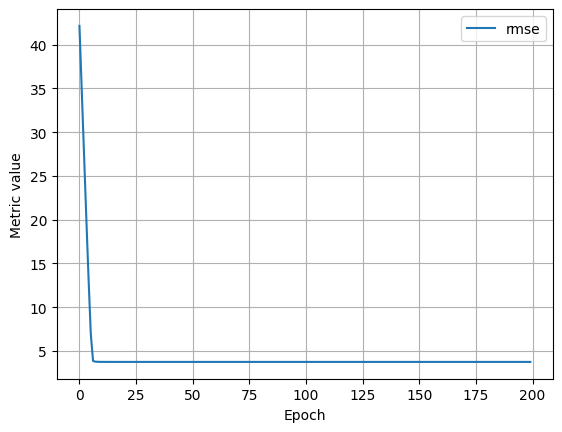

In [34]:
#@title Code - Experiment 1
# @title Código - Experimento 1

# The following variables are the hyperparameters.
# Las siguientes variables son los hiperparámetros.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 200,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')


Epoch 1/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 320.3715 - rmse: 17.8779
Epoch 2/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 124.3490 - rmse: 11.1173
Epoch 3/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 30.6448 - rmse: 5.5164
Epoch 4/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18.3645 - rmse: 4.2814
Epoch 5/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17.2281 - rmse: 4.1481
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


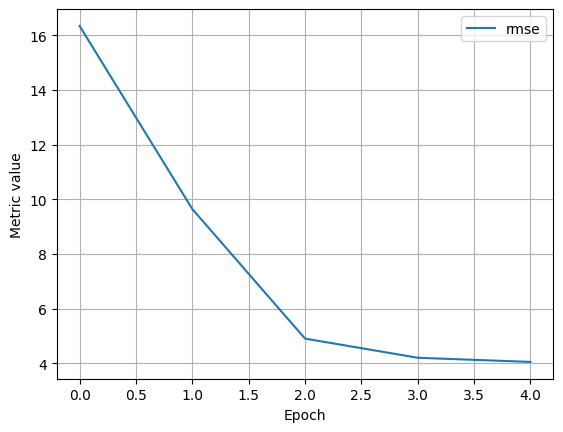

In [38]:
#@title Code - Experiment 1
# @title Código - Experimento 1

# The following variables are the hyperparameters.
# Las siguientes variables son los hiperparámetros.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 5,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')


Epoch 1/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 189.5790 - rmse: 13.7598
Epoch 2/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 106.6144 - rmse: 10.3180
Epoch 3/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53.8749 - rmse: 7.3258
Epoch 4/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.1654 - rmse: 5.0104
Epoch 5/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.1892 - rmse: 4.4836
Epoch 6/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.2346 - rmse: 4.3808
Epoch 7/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.0858 - rmse: 4.1286
Epoch 8/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.3047 - rmse: 4.3848
Epoch 9/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.4568 - rmse: 4.0527
Epoch 10/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.6803 - rmse: 3.9587
Epoch 11/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.5083 - rmse: 4.0436
Epoch 12/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.3577 - rmse: 3.91

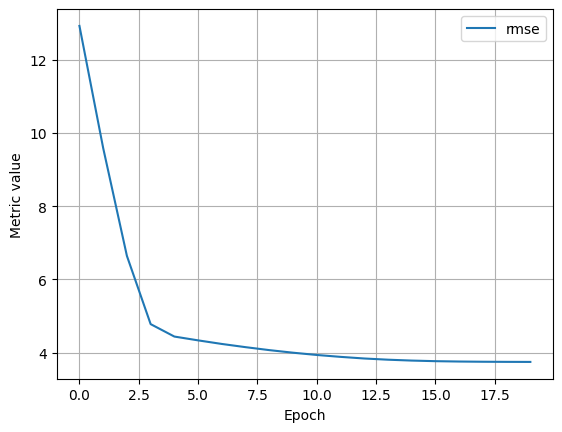

In [39]:
#@title Code - Experiment 1
# @title Código - Experimento 1

# The following variables are the hyperparameters.
# Las siguientes variables son los hiperparámetros.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 100,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')


Epoch 1/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 81.2313 - rmse: 8.7748
Epoch 2/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 16.5885 - rmse: 4.0647
Epoch 3/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 14.1551 - rmse: 3.7590
Epoch 4/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 15.0250 - rmse: 3.8704
Epoch 5/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 14.2353 - rmse: 3.7635
Epoch 6/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 13.3971 - rmse: 3.6532
Epoch 7/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 15.5302 - rmse: 3.9297
Epoch 8/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 15.8312 - rmse: 3.9509
Epoch 9/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 15.2618 - rmse: 3.9009
Epoch 10/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 13.3237 - rmse: 3.6436
Epoch 11/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 14.1095 - rmse: 3.7496
Epoch 12/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss:

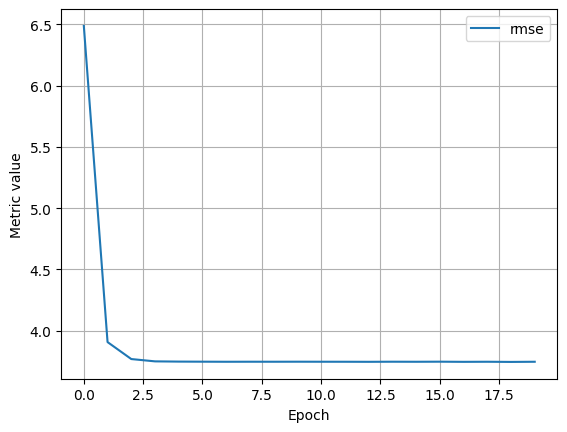

In [40]:
#@title Code - Experiment 1
# @title Código - Experimento 1

# The following variables are the hyperparameters.
# Las siguientes variables son los hiperparámetros.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 10,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')


In [29]:
#@title Double-click to view answers for training model with one feature
# @title Doble clic para ver las respuestas del entrenamiento del modelo con una sola característica

# How many epochs did it take to converge on the final model?
# -----------------------------------------------------------------------------
# ¿Cuántas épocas tomó para que el modelo converja?
answer = """
Usa la curva de pérdida para ver en qué punto la pérdida empieza a estabilizarse durante el entrenamiento.

Con este conjunto de hiperparámetros:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

toma aproximadamente 5 épocas para que la ejecución de entrenamiento converja al modelo final.
"""
print(answer)

# How well does the model fit the sample data?
# -----------------------------------------------------------------------------
# ¿Qué tan bien se ajusta el modelo a los datos de ejemplo?
answer = '''
Según la gráfica del modelo, parece que el modelo se ajusta bastante bien a los datos de ejemplo.
'''
print(answer)



Usa la curva de pérdida para ver en qué punto la pérdida empieza a estabilizarse durante el entrenamiento.

Con este conjunto de hiperparámetros:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

toma aproximadamente 5 épocas para que la ejecución de entrenamiento converja al modelo final.


Según la gráfica del modelo, parece que el modelo se ajusta bastante bien a los datos de ejemplo.



Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 118.7425 - rmse: 9.5002
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.9135 - rmse: 3.7180
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.2408 - rmse: 3.7655
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.6115 - rmse: 3.8202
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15.3697 - rmse: 3.9051
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15.7470 - rmse: 3.9588
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.8359 - rmse: 3.8435
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.9898 - rmse: 3.7380
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15.8162 - rmse: 3.9686
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16.2473 - rmse: 4.0257
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.6036 - rmse: 3.8079
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.1242 - rmse: 3.8800


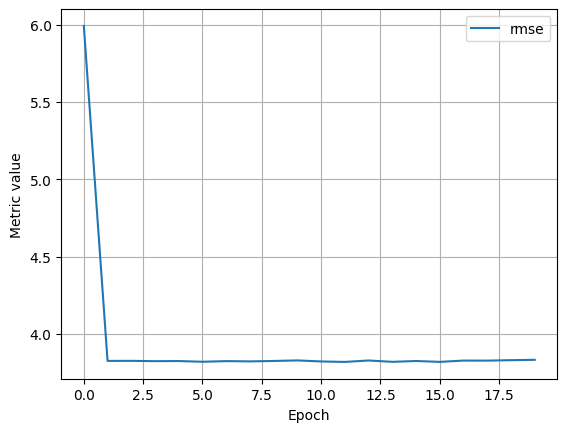

In [30]:
#@title Code - Experiment 1
# @title Código - Experimento 1

# The following variables are the hyperparameters.
# Las siguientes variables son los hiperparámetros.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.1,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')
